In [99]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy
import corner
import emcee

Usando los puntos del ejercicio_fit

Text(0, 0.5, 'y')

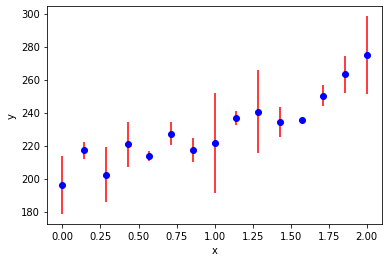

In [100]:
#Prueba con recta del ejercicio
fit = np.load('test_line.npy')
x = fit[0]
y = fit[1]
y_err = fit[2]

plt.errorbar(x, y, abs(y_err),linestyle='none', marker='o',color='blue', ecolor='red')
plt.xlabel('x')
plt.ylabel('y')

Definimos funciones de recta y likelihood

In [101]:
#El modelo sera una recta
def recta(x,a,b):
    return a*x + b

def chisquare(t,data):
    x = data[0]
    y = data[1]
    y_err = data[2]
    
    model = recta(x,t[0],t[1])
    chisq = (y-model)**2 / y_err**2
    
    return chisq.sum()

def likelihood2(t, x,y,y_err):
    modelo = recta(x, t[0], t[1])
    result = (y-modelo)**2 / y_err**2
    return -0.5*result.sum()

<Figure size 432x288 with 0 Axes>

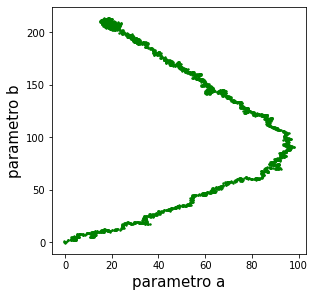

In [102]:

# sigma de a y b
sigma_a = 0.4
sigma_b = 0.4

#Parametros iniciales
ai = 0.
bi = 0.
R=10
a = [ai]
b = [bi]
ch_i = chisquare([ai,bi],[x,y,y_err])


for i in range(10000): 
    #Generamos dos numeros random con los que comparar
    a_rf = np.random.normal(ai,sigma_a) 
    b_rf = np.random.normal(bi,sigma_b) 
    ch = chisquare([a_rf,b_rf],[x,y,y_err]) 
    if ch < ch_i:
        a.append(a_rf)
        b.append(b_rf)
        ai = a_rf
        bi = b_rf
        ch_i = ch
        
    else:
        r = -np.log(np.random.uniform(0,1))
        fiv = abs(ch-ch_i)
        if div<r:
            a.append(a_rf)
            b.append(b_rf)
            ai = a_rf
            bi = b_rf
            ch_i = ch

        else:
            a.append(a_rf)
            b.append(b_rf)
            


plt.figure(3)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(a,b,s=2,color = 'green')
plt.ylabel('parametro b',fontsize=15)
plt.xlabel('parametro a',fontsize=15);

Asi obtenemos los valores de la pendiente y la ordenada con el uso de chisq

In [103]:
print('a=',a[10000])
print('b=',b[10000])

a= 18.390399502929032
b= 207.92493420312863


### Ahora con emcee

In [104]:
inicio=[100,100]

pos=inicio+ 1e-4*np.random.randn(42,2)
nwalkers, ndim=pos.shape

sampler=emcee.EnsembleSampler(nwalkers,ndim,likelihood2,args=(fit))
sampler.run_mcmc(pos, 5000,progress=True);

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 358.80it/s]


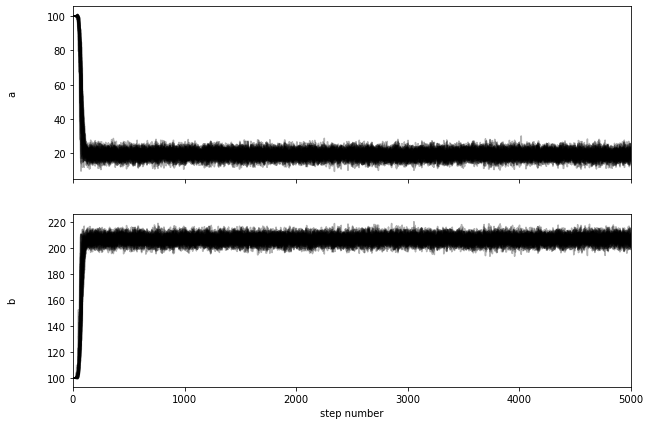

In [105]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a", "b"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [106]:

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
a_last = flat_samples[13691,0]
b_last = flat_samples[13691,1]
print('a=',a_last)
print('b=',b_last)


a= 19.075903145938476
b= 205.98080686995615
